In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
hearing_df_original = pd.read_csv('../../data/hearing_test.csv')
hearing_df = hearing_df_original.copy()
hearing_df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


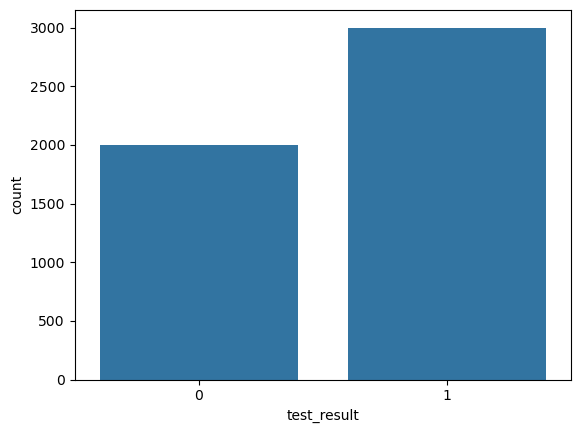

In [18]:
sns.countplot(data=hearing_df,x='test_result')
plt.show()

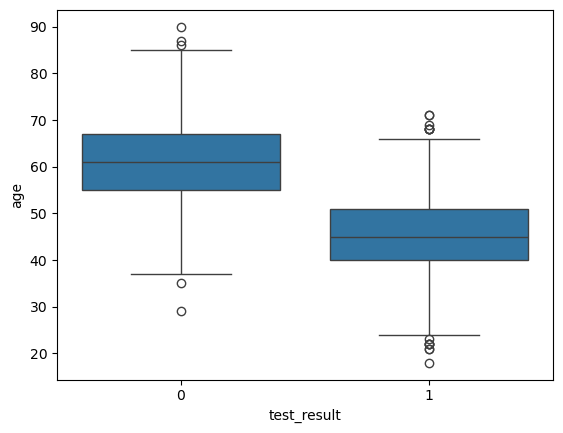

In [19]:
sns.boxplot(data=hearing_df, x='test_result',y='age')
plt.show()

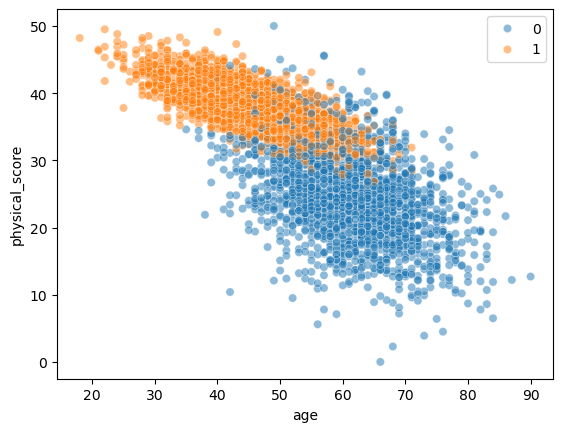

In [20]:
sns.scatterplot(data=hearing_df,x='age',y='physical_score',alpha=0.5,hue='test_result')
plt.legend()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = hearing_df.drop('test_result',axis=1)
y = hearing_df['test_result']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

scalar = StandardScaler()
scalar_X_train = scalar.fit_transform(X_train)
scalar_X_test = scalar.transform(X_test)

log_model = LogisticRegression()
log_model.fit(scalar_X_train,y_train)
test_predictions = log_model.predict(scalar_X_test)
test_predictions

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [22]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [23]:
test_predictions_prob = log_model.predict_proba(scalar_X_test)
df_test_predictions_prob = pd.DataFrame(test_predictions_prob)
df_test_predictions_prob

,0,1
0,0.023805,0.976195
1,0.026885,0.973115
2,0.989220,0.010780
3,0.001902,0.998098
4,0.975066,0.024934
...,...,...
495,0.043955,0.956045
496,0.186766,0.813234
497,0.980648,0.019352
498,0.994730,0.005270


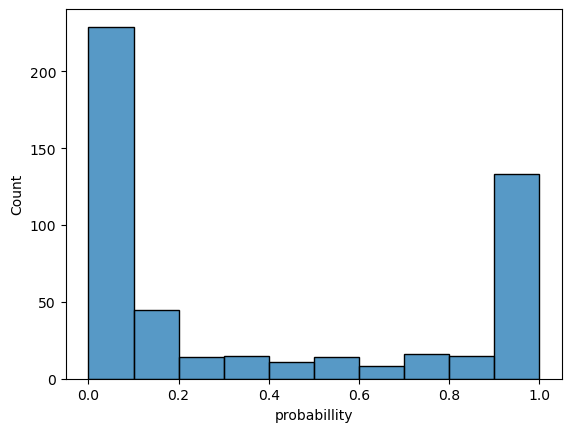

In [24]:
sns.histplot(data=df_test_predictions_prob,x=0)
plt.xlabel('probabillity')
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acurracy_score = accuracy_score(y_test,test_predictions)
acurracy_score

0.93

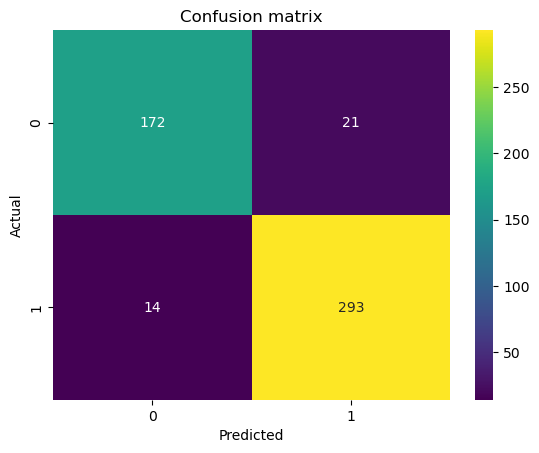

In [26]:
cm = confusion_matrix(y_test,test_predictions)
cmap = plt.cm.viridis
sns.heatmap(cm, annot=True, fmt="d", cmap = cmap)

plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()